In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as scipySignal
import seaborn as sns
from scipy import signal

## [1] Contionus Signal : 

####  [A] Basic Signal : 
Consider the following signal with basic transformations of the form:
y(t) = Ax(Bt+C) where A is the amplitude scaling factor, B is the
time scaling factor, C is the time shift.

Plot the following signals:

x1(t) = u(t) ,  

x2(t) = r(t) = tu(t) , 

x3(t) = p(t) = t^2u(t)/2,

x4(t) = rect(t/τ ), 

x5(t) = tri(t/τ ) ,

x6(t) =sinct =sin πt/πt

where :

u(t) is the unit impulse signal,

r(t) is the ramp signal, 

and p(t) is the parabolic signal, 

rect(t/τ ) is a rectangular pulse between −τ /2 to τ /2 ,

similarly tri(t/τ ) is triangular pulse from −τ /2 to τ /2 .



Text(0.5, 1.0, 'sinc signal')

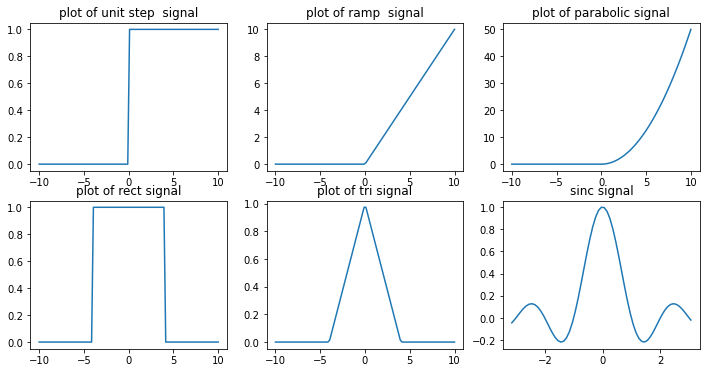

In [4]:
def cont_fun(t): 
    fun =[] 
    for sample in t: 
        if sample<0: 
            fun.append(0) 
        else:
            fun.append(1)
    return fun

def unit_ramp(t): 
    ramp =[] 
    for sample in t: 
        if sample<0: 
            ramp.append(0) 
        else: 
            ramp.append(sample) 
    return ramp

def unit_para(t): 
    para =[] 
    for sample in t: 
        if sample<0:
            para.append(0) 
        else: 
            k = (sample**2)/2
            para.append(k)
    return para

def unit_rect(t): 
    rect =[] 
    T= 8
    for k in t :
        if k>=-T/2 and k <T/2:
            rect.append(1) 
        else: 
            rect.append(0)
    return rect 

def unit_tri(t): 
    tri =[] 
    T =8
    for k in t :
        if k>=-T/2 and k <=T/2  :
            a = 1-(2*abs(k))/T
            tri.append(a)
        else: 
            tri.append(0)
    return tri

def unit_sinc(t): 
    sci =[]     # sin*pi*t/pi*t
    for k in t :
        a = (np.sin(np.pi*k))/(np.pi*k)
        sci.append(a)
    return sci 

t = np.linspace(-10,10, 100)
t2 = np.arange(-np.pi,np.pi,0.1)  
fig , ax = plt.subplots(nrows = 2, ncols = 3,figsize=(12,6))
sinc =unit_sinc(t2)
lst = [cont_fun(t),unit_ramp(t),unit_para(t),unit_rect(t),unit_tri(t)]
na =["unit step ","ramp ", "parabolic","rect","tri" ] #rect ","tri"
c =1
for count in range(len(lst)):
    plt.subplot(2,3,c)
    plt.plot(t,lst[count])
    plt.title("plot of "+str(na[count])+" signal")
    c =c+1
plt.subplot(2,3,6)
plt.plot(t2,sinc)
plt.title("sinc signal")

## [B] Shifted Signal 
Also draw the amplitude scaled and time shifted
versions of these 3 signals with amplitude scaling factor A = 5 and
shift C = 2 sec.

Finally, plot the time scaled versions of the original
signals x1(t), x2(t), x3(t) with time scaling factor as B = 0.5, 2

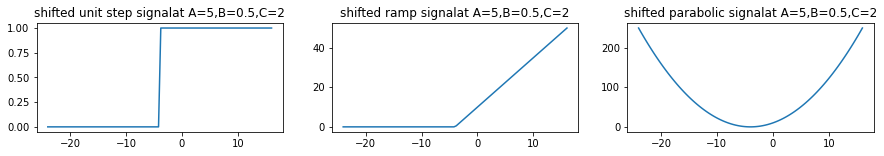

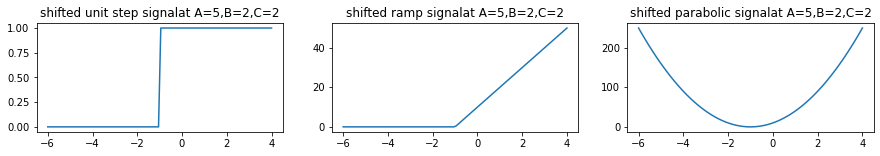

In [5]:
def shift1(t,B):
    A = 5
    C =2
    x = (t-C)/B    
    u =(t>=0)
    r = A*t*u
    p = A*t**2/2
    out =[u,r,p]
    fig, axs = plt.subplots(1,3,figsize=(15,2))
    na = ["unit step signal","ramp signal","parabolic signal"]
    c= 1
    for k in range(len(out)):
        plt.subplot(1,3,c)
        plt.plot(x,out[k])
        plt.title("shifted "+str(na[k])+"at A=5,B=0.5,C=2")
        c =c+1
    return  
def shift2(t,B):
    A = 5
    C =2
    x = (t-C)/B    
    u =(t>=0)
    r = A*t*u
    p = A*t**2/2
    out =[u,r,p]
    fig, axs = plt.subplots(1,3,figsize=(15,2))
    na = ["unit step signal","ramp signal","parabolic signal"]
    c =1
    for k in range(len(out)):
        plt.subplot(1,3,c)
        plt.plot(x,out[k])
        plt.title("shifted "+str(na[k])+"at A=5,B=2,C=2")
        c =c+1
    return  
t = np.linspace(-10,10,100)
shift1(t,0.5)
shift2(t,2)

## [C] Exponentials
Consider the signals of the form: x(t) = AeBt . Plot x(t) for different values of A and B. Take A = −5 and 5 and B in range
[−5, −2, −0.5, −0.25, 0, 1, 2]. Plot all possible combinations to get a
taste of how exponentials behave.


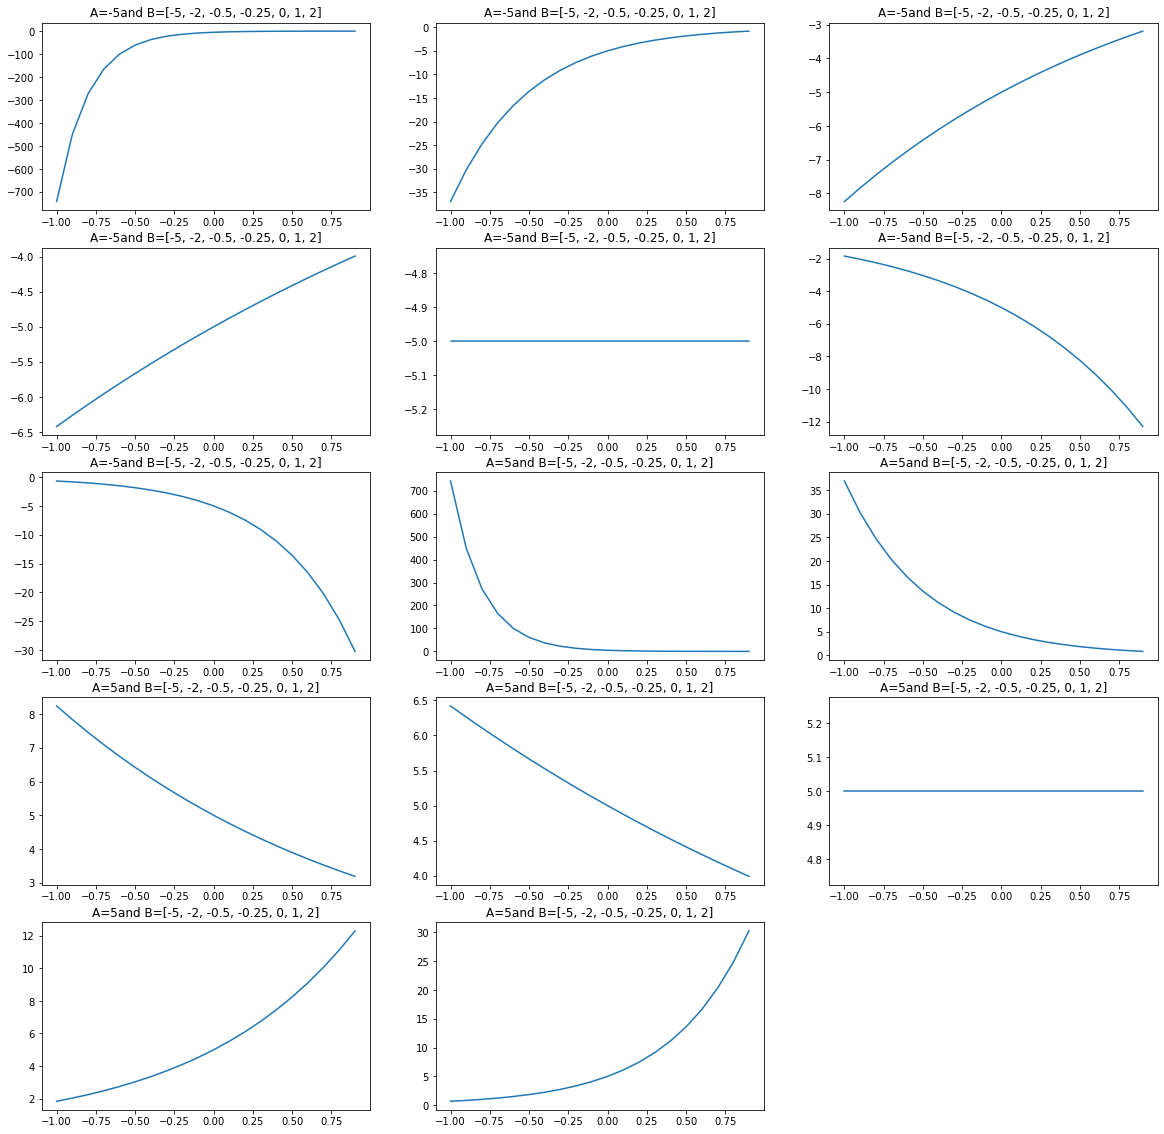

In [7]:
def exponential(A,B, t): 
    expo =[] 
    for sample in t: 
        expo.append(A*(np.exp(B * sample)))
    return (expo)         

def exp_plot():
    B = [-5, -2, -0.5, -0.25, 0, 1, 2]
    A = [-5,5]
    t = np.arange(-1, 1, 0.1)
    count=1
    fig, axs = plt.subplots(2, 3, figsize=(20,20))
    for a in A :
        for k in B :
            p1 = exponential(a,k,t)
            plt.subplot(5,3,count)
            plt.plot(t,p1)
            plt.title("A="+str(a)+"and B="+str(B))
            count = count +1 
    return 
exp_plot()


##  [D] Sinusoids

x1(t) = 5 sin 2πt , x2(t) = 2 sin(2π/3)t, x3(t) = 4 cos(π/3)t, x4(t) =3 cos(2πt +π/3),

x5(t) = x1(t) + x2(t) , x6(t) = x3(t) + x4(t) ,

x7(t) = x1(t) + x3(t) , x8(t) = x1(−t) , x9(t) = x3(−t) .

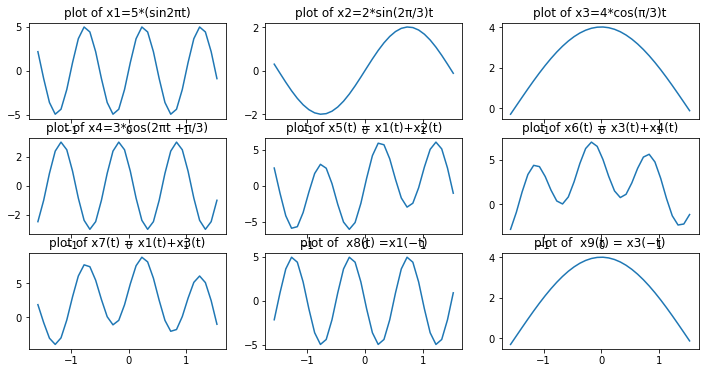

In [94]:
def sin1(t):
    sin1 =[]
    for sample in t:
        a = 5*(np.sin(2*np.pi*sample))
        sin1.append(a)
    return sin1
    
def sin2(t):
    sin2 =[]
    for sample in t:
        a = 2*(np.sin(2*np.pi/3*sample))
        sin2.append(a)
    return sin2
    
def cos1(t):
    cos1 =[]
    for sample in t:
        a = 4*(np.cos(np.pi/3*sample))
        cos1.append(a)
    return cos1

def cos2(t):
    cos2 = []
    for sample in t:
        a = 3*(np.cos((2*np.pi*sample)+(np.pi/3)))
        cos2.append(a)
    return cos2

def x5(t):
    x5 =[]
    for sample in t:
        a =5*(np.sin(2*np.pi*sample))
        b =2*(np.sin(2*np.pi/3*sample))
        c = a+b
        x5.append(c)
    return x5

def x6(t):
    x6 =[]
    for sample in t :
        a = 4*(np.cos(np.pi/3*sample))
        b =3*(np.cos((2*np.pi*sample)+(np.pi/3)))
        c = a+b
        x6.append(c)
    return x6

def x7(t):
    x7 =[]
    for sample in t:
        a = 5*(np.sin(2*np.pi*sample))
        b = 4*(np.cos(np.pi/3*sample))
        c =a+b
        x7.append(c)
    return x7

def x8(t):
    x8 =[]
    for sample in t:
        a = 5*(np.sin(2*np.pi*-sample))
        x8.append(a)
    return x8 

def x9(t):
    x9 =[]
    for sample in t:
        a = 4*(np.cos(np.pi/3*-sample))
        x9.append(a)
    return x9

count =0 
t = np.arange(-np.pi/2,np.pi/2,0.1) 
fig, ax = plt.subplots(3, 3, figsize=(12,6))
lst = [sin1(t),sin2(t),cos1(t),cos2(t),x5(t),x6(t),x7(t),x8(t),x9(t)]
na =["x1=5*(sin2πt)","x2=2*sin(2π/3)t", "x3=4*cos(π/3)t","x4=3*cos(2πt +π/3)","x5(t) = x1(t)+x2(t)" , "x6(t) = x3(t)+x4(t)","x7(t) = x1(t)+x3(t)" ," x8(t) =x1(−t)"," x9(t) = x3(−t)"]
c =1
for count in range(len(lst)):
    plt.subplot(3,3,c)
    plt.plot(t,lst[count])
    plt.title("plot of "+str(na[count]))
    c =c+1


##  [E] Complex Exponentials

Consider the signals of form: y(t) = A(e^Bt)cos ωt . Plot the signals, where A = 0.1, 0.5, 1, 2 and b = −0.25, −0.5, −1, 0.5, 1 and
ω = 2π, π/6,5π/3



<Figure size 432x288 with 0 Axes>

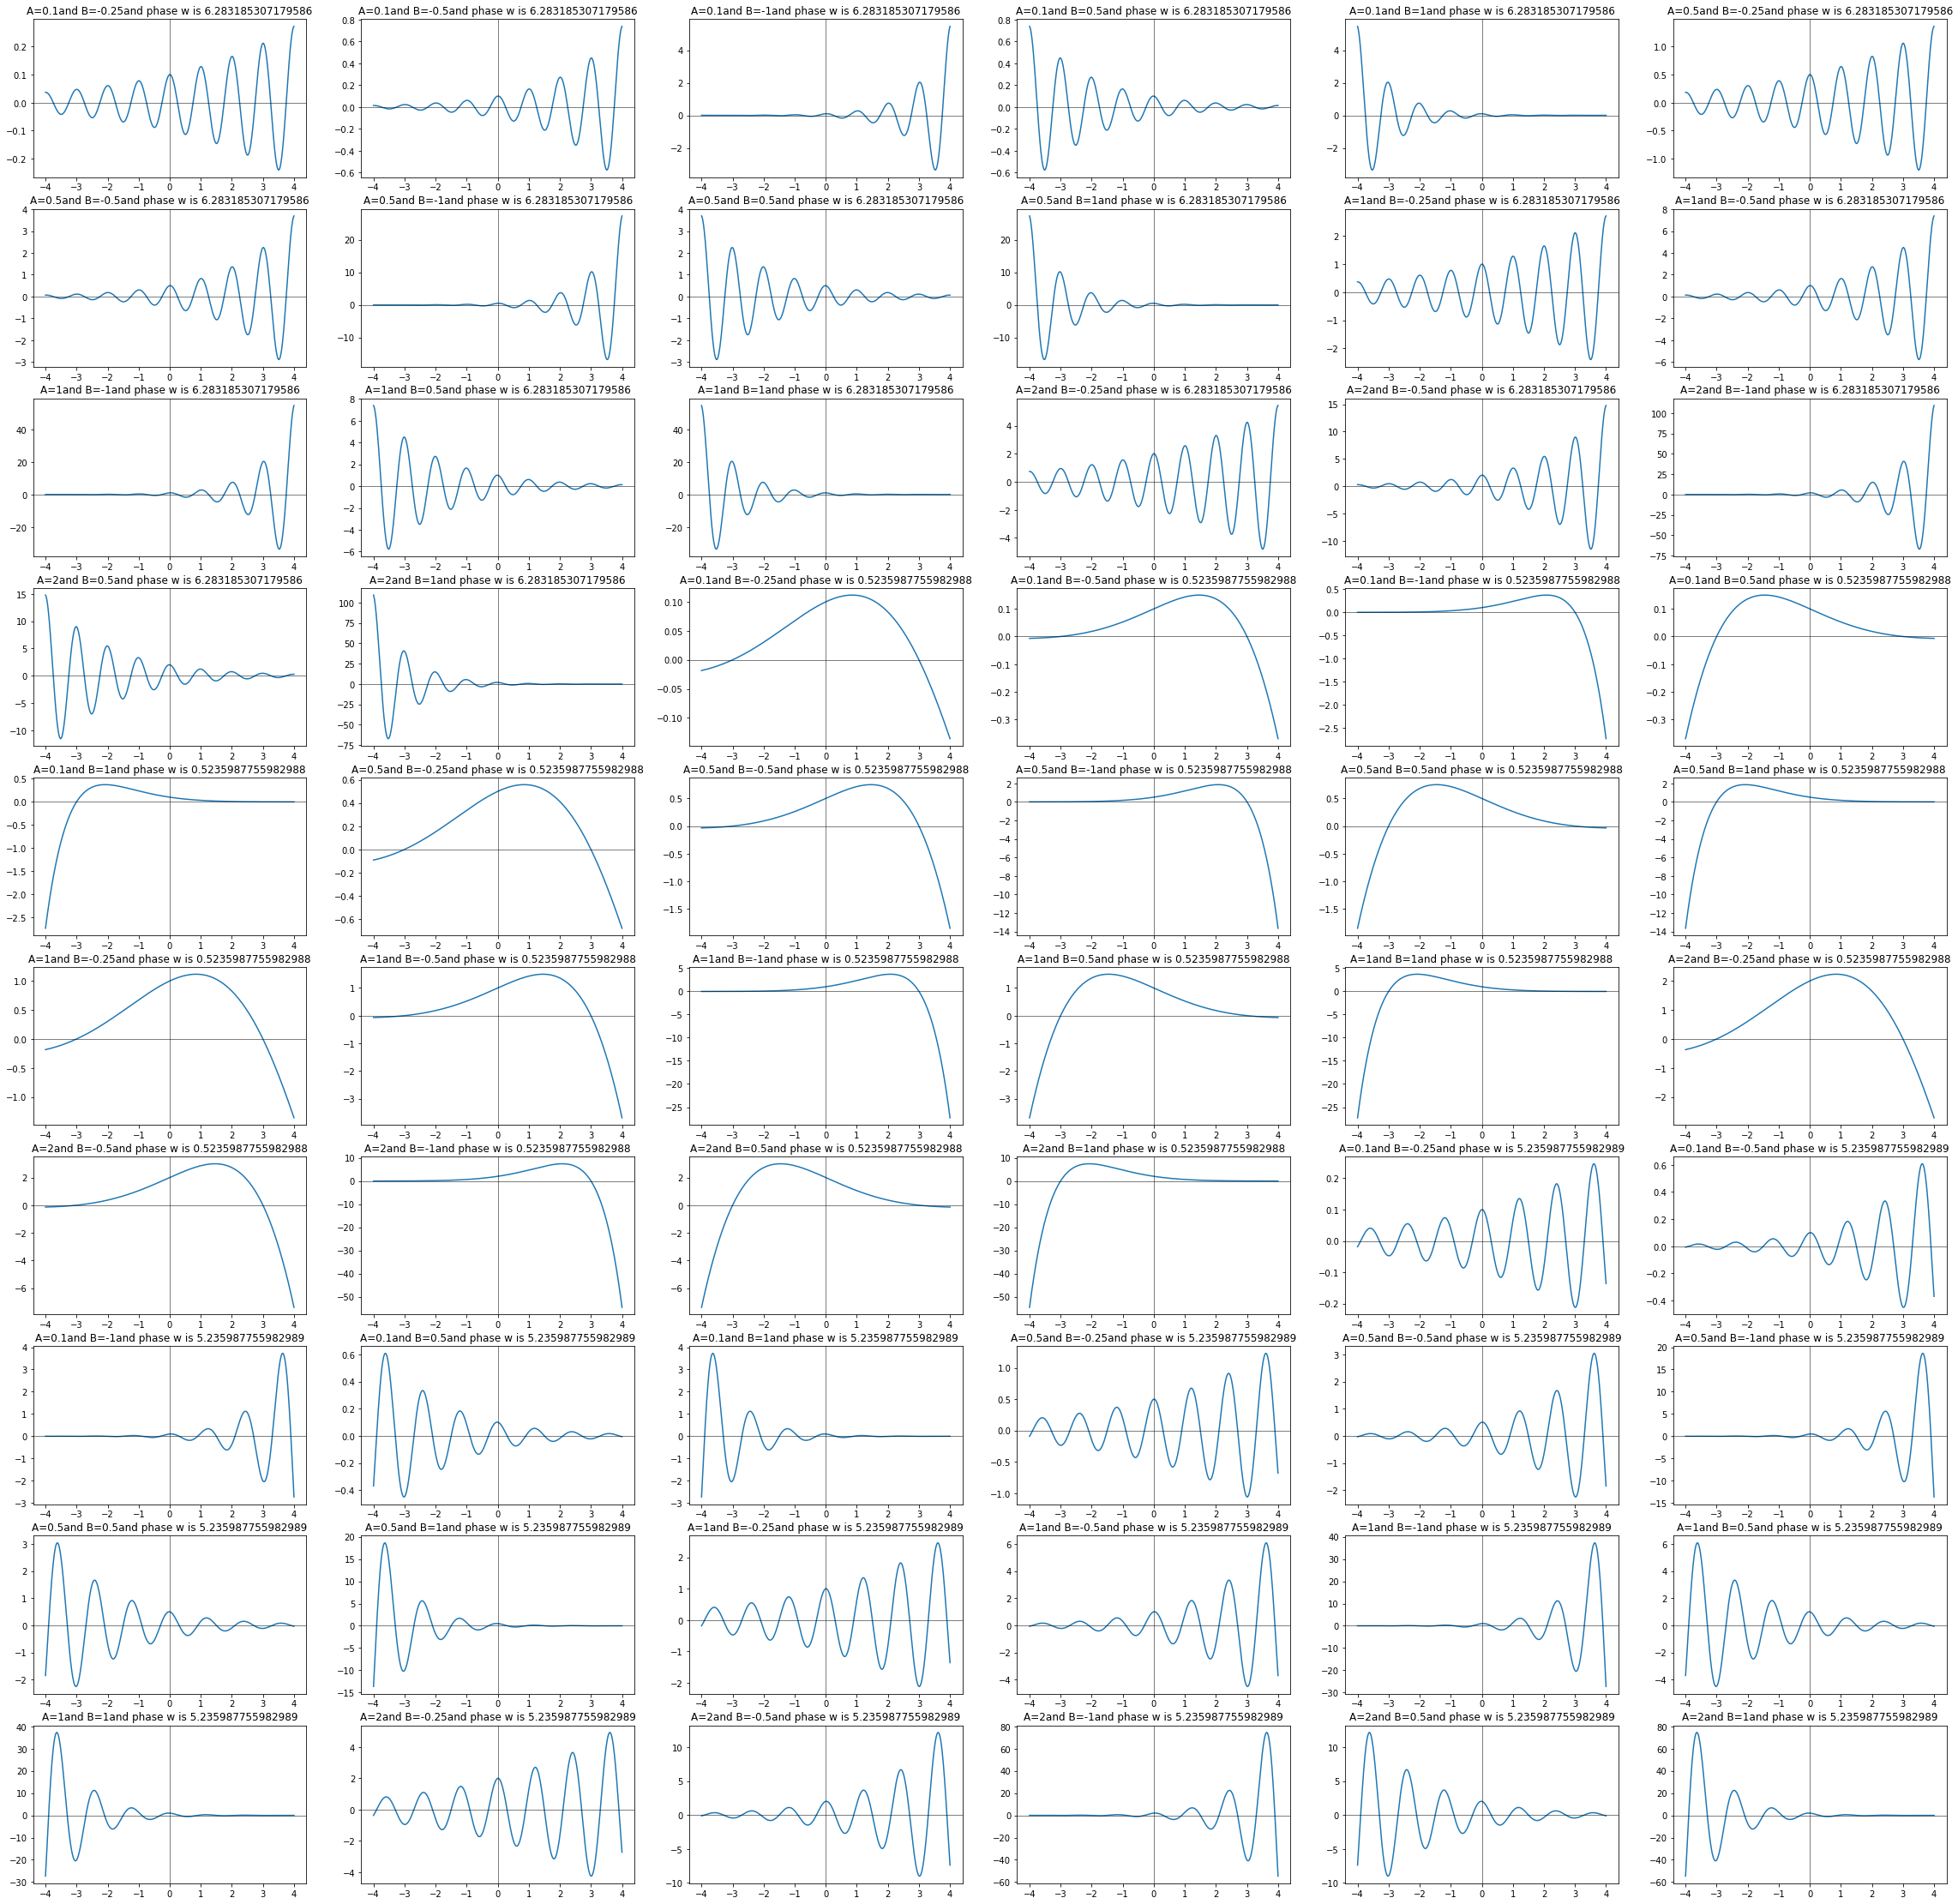

In [65]:

t=np.linspace(-4,4,1000)
A=[0.1,0.5,1,2]
B=[-0.25,-0.5,-1,0.5,1]
c=[np.pi*2,np.pi/6,np.pi*5/3]
fig=plt.figure(1)
k =1
fig, axs = plt.subplots(10,6, figsize=(40,40))
for s in c :
    for a in A:
        for b in B:
            y=a*(np.exp(-b*t))*(np.cos(s*t))
            plt.subplot(10,6,k)
            plt.plot(t,y)
            plt.title("A="+str(a)+"and B="+str(b)+"and phase w is "+str(s))
            plt.axhline(0,color='k',lineWidth=0.5)
            plt.axvline(0,color='k',lineWidth=0.5)
            k = k +1

## [F] A special type of complex exponential 
y(t) = A(e^st), where s = σ +jω .

Consider, a phases shift introduced to the signal y(t) with phase θ .

The resultant signal becomes, y(t) = Aej(ωt+θ).

Plot the real and imaginary parts ( Re(y(t)) and Im(y(t)) ) of the following signals, with the following parameters

(A, ω, θ):
(1, 0.14π, 0) , (1, 0.14π, π) ,(2, 0.34π, 0.5π) , (2, 0.75π, π/3)

<Figure size 432x288 with 0 Axes>

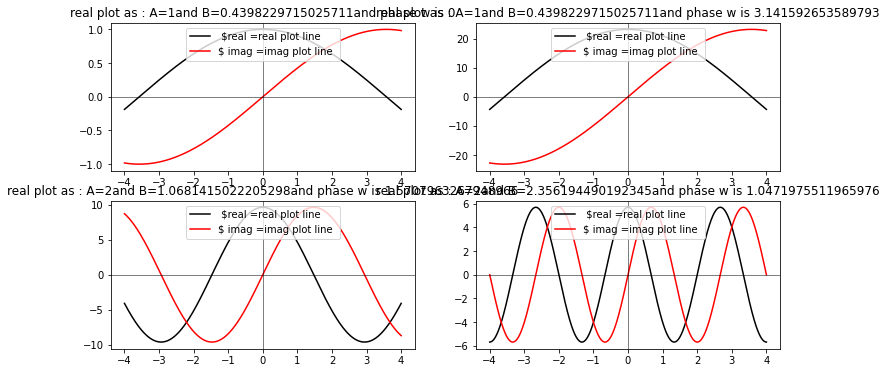

In [69]:
t=np.linspace(-4,4,1000)
A =[1,1,2,2]
w = [np.pi*0.14,np.pi*0.14,np.pi*0.34,np.pi*0.75]
theta = [0,np.pi,np.pi*0.5,np.pi/3]
fig=plt.figure(1)
k =1
fig, axs = plt.subplots(10,6, figsize=(12,6))
for i in range(len(A)):
    real = A[i]*(np.exp(1j*w[i]*t+theta[i]).real)
    img = A[i]*(np.exp(1j*w[i]*t+theta[i]).imag)
    #real = A[i]*(np.cos(w[i]*t+theta[i]))
    #img = A[i]*(np.sin(w[i]*t+theta[i]))
    plt.subplot(2,2,k)
    plt.plot(t,real,color="black" ,label =" $real =real plot line")
    plt.plot(t,img,color="red",label = "$ imag =imag plot line ")
    plt.title("real plot as : A="+str(A[i])+"and B="+str(w[i])+"and phase w is "+str(theta[i]))
    plt.legend(loc='upper center')
    plt.axhline(0,color='k',lineWidth=0.5)
    plt.axvline(0,color='k',lineWidth=0.5)
    k = k +1

## [2] Discrete Signals :

#### [A] Plot the following signals: 

x1[n] = δ[n] , x2[n] = 3δ[n] , x3[n] = 3δ[2n] ,

x4[n] = 3δ[2n−5] , x5[n] = 3δ[n*2+3n+2] , x6[n] = x1[n]+x2[n]+x3[n] ,

x7[n] = δ[n] , x8[n] = P∞k=−∞ δ[n − k] (Impuse Train), x9[n] = δ[n]


You can use the discrete impulse train to sample continuous signals in intervals of 1 sec.



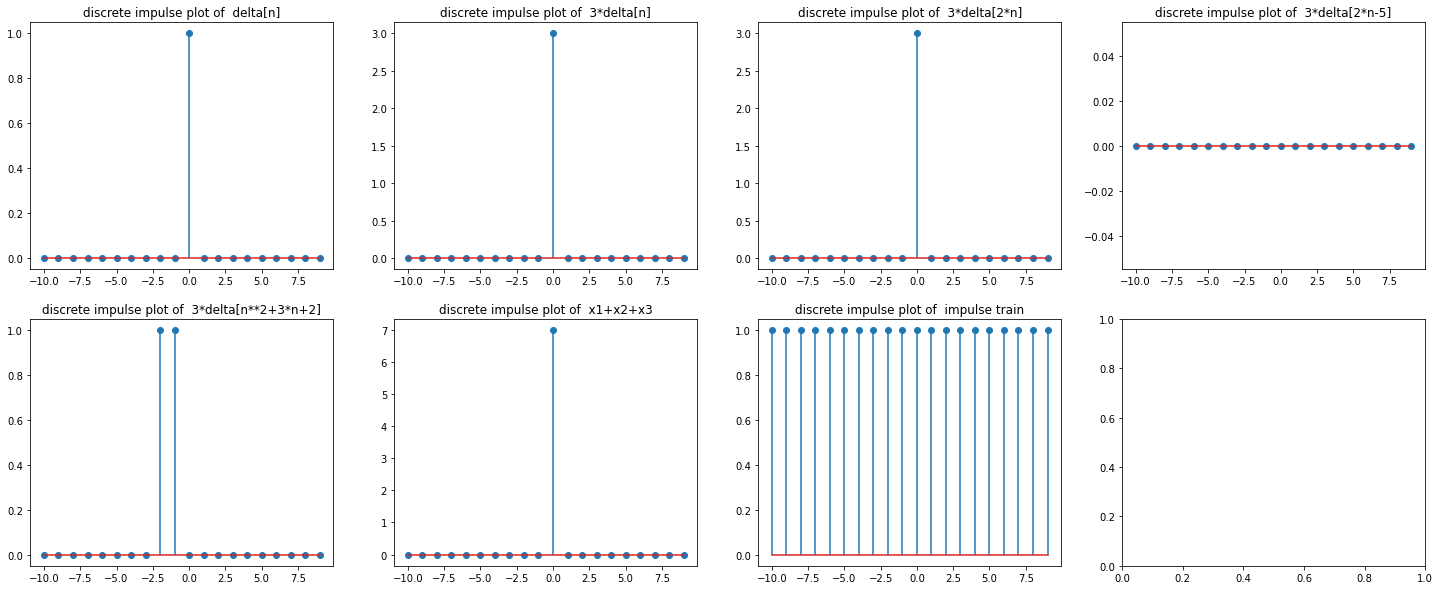

In [124]:
n = np.arange(-10,10, 1) 
x1= (n==0)  
x2 = 3*(n==0)
x3 = 3*(n/2==0)
x4 = 3*((2*n-5)==0)  
x5 =[]
for k in n :
    if k==-1 or  k==-2:
        x5.append(1)
    else:
        x5.append(0)
x6 = x1+x2+x3
x7 =[]
for k in n:
    x7.append(1)
    
delta =[x1,x2,x3,x4,x5,x6,x7]
name=["delta[n]","3*delta[n]","3*delta[2*n]","3*delta[2*n-5]","3*delta[n**2+3*n+2]","x1+x2+x3","impulse train"]
fig, axs = plt.subplots(2,4, figsize=(25,10))
c =1
for k in range(len(delta)):
    plt.subplot(2,4,c)
    plt.stem(n,delta[k],use_line_collection=True)
    plt.title("discrete impulse plot of  "+str(name[k]))
    c =c+1   

## [B] Plot the discrete counter parts of all the signals given in the Continuous Signals section.

Replace x(t) by x[n] and plot them.

Text(0.5, 1.0, 'discrete plot of sinc signal ')

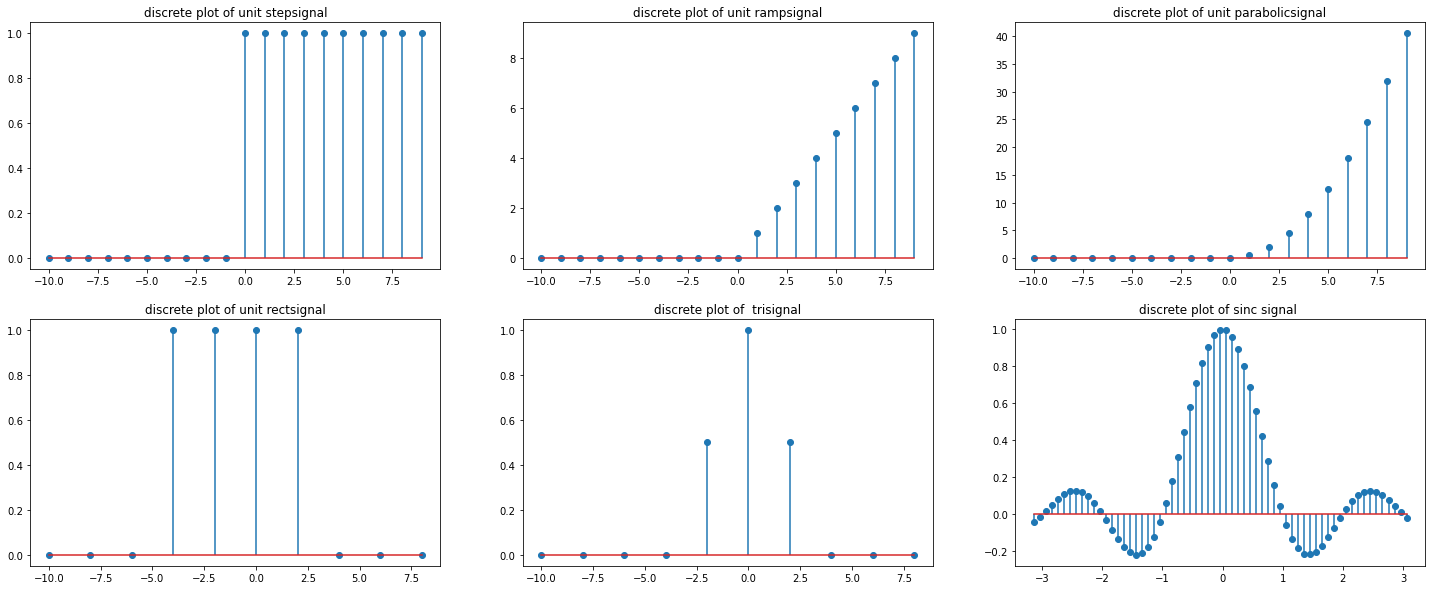

In [12]:
n = np.arange(-10,10, 1)
n1= np.arange(-10,10,2)
n2 = np.arange(-np.pi,np.pi,0.1)  

fun =[cont_fun(n),unit_ramp(n),unit_para(n)]
na =["unit step","unit ramp","unit parabolic"]
fig, axs = plt.subplots(2,3, figsize=(25,10))
c =1
for k in range(len(fun)):
    plt.subplot(2,3,c)
    plt.stem(n,fun[k],use_line_collection=True)
    plt.title("discrete plot of "+str(na[k])+"signal")
    c =c+1  
fun1 = [unit_rect(n1),unit_tri(n1)]
na1 = ["unit rect"," tri"]
c =4
for k in range(len(fun1)):
    plt.subplot(2,3,c)
    plt.stem(n1,fun1[k],use_line_collection=True)
    plt.title("discrete plot of "+str(na1[k])+"signal")
    c =c+1  

f =unit_sinc(n2)
plt.subplot(2,3,6)
plt.stem(n2,f,use_line_collection=True)
plt.title("discrete plot of sinc signal ")


#### The impulse function, unit step function, ramp function and parabolic function in continuous time are related by the differentiation operation.

If we differentiate unit step we get impulse and so on. Is there any relation between the discrete counterparts?

If yes how will you implement ramp function from parabolic function, unit step from ramp and impulse function from unit step in the discrete time domain.

In [122]:
print("we can obtain basic signal by difference property in discrete time domain :")
print("1) unit impulse from unit step as:\n delta[n]=u[n]-u[n-1]")
print("2) unit step from ramp as: \n u[n]=r[n+1]-r[n]")
print("3) unit ramp from unit parabola as:\n summation k=1 to k=infinity (u[n-k])")

we can obtain basic signal by difference property in discrete time domain :
1) unit impulse from unit step as:
 delta[n]=u[n]-u[n-1]
2) unit step from ramp as: 
 u[n]=r[n+1]-r[n]
3) unit ramp from unit parabola as:
 summation k=1 to k=infinity (u[n-k])


## [D] Plot an alternating discrete periodic square wave using impulse train.

Text(0, 0.5, 'Amplitude')

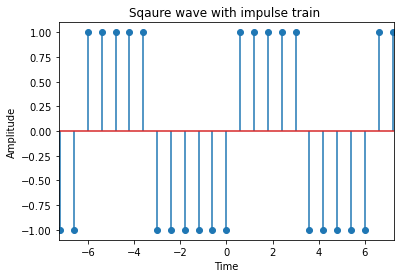

In [15]:
from scipy import signal
t =np.arange(-15,15,0.6)
y = signal.square(t)
plt.stem(t,y,use_line_collection=True)

plt.xlim(-7.25,7.25)
plt.title('Sqaure wave with impulse train ')
plt.xlabel('Time')
plt.ylabel('Amplitude')

## [3]. Systems (Time domain approach)


## [A] Convolution Function 
 Write a function for performing convolution.
    
Use this function to calculate the output for the following system: x[n] =
2, 4, 5, 2, 7, h[n] = 8, −5, 4.

In [31]:
def convolution(inputSeq, impulseResponse):
    N =len(inputSeq)+len(impulseResponse)-1
    k = max(len(inputSeq),len(impulseResponse))
    aa = len(inputSeq)
    lst =[]
    for s in range(k):
        impulseResponse.append(0)
    for n1 in range(N):
        for k1 in range(len(inputSeq)):
            a = inputSeq[k1]*impulseResponse[n1-k1]
            lst.append(a)
            outputseq=[]
            for i in range(N):
                a = sum(lst[(aa)*i : (aa)*(i+1)])
                outputseq.append(a)
                    
    return outputseq 

x = [2, 4, 5, 2, 7]
h = [ 8,-5, 4]
final =convolution(x,h)
print("convolution output y[n] is :",final)



convolution output y[n] is : [16, 22, 28, 7, 66, -27, 28]


## [B] Calculate the impulse response  for
 y[n] = 2x[n−3]

 find the response of the system to the following inputs:
        
 unit step function u[n], ramp function r[n], parabolic function p[n], 

the complex exponential e^sn where s = 2+j3.

Plot the input signals and their responses.

Plot the real and imaginary part of the response for complex exponential input. 

Do you see some pattern in the input and response of complex exponential signal?


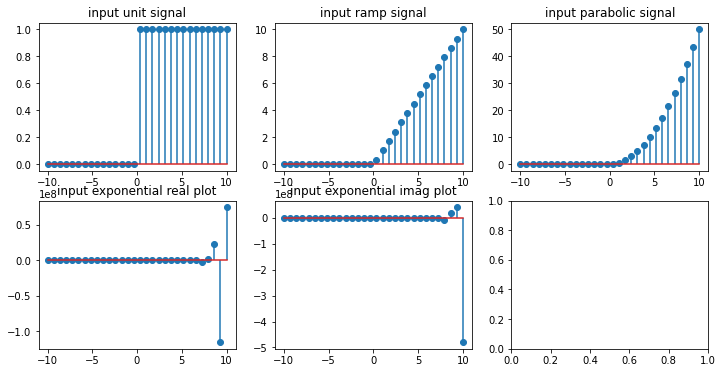

In [119]:
def input_signal(n,in_re):
    re =[]
    for sample in n :
        if sample <=0:
            re.append(0)
        elif in_re == "unit":
            re.append(1)
        elif in_re =="ramp" :
            re.append(sample)
        elif in_re =="expo real":
             # k = 2*(np.exp(2*sample)*np.cos(3*sample))
             k = (np.exp(2*sample + 3j*sample)).real
             re.append(k)
        elif in_re=="expo imag":
             #k = 2*(np.exp(2*sample)*np.sin(3*sample))
             k = (np.exp(2*sample + 3j*sample)).imag
             re.append(k)
        else :
            re.append(sample**2/2)
    return re

n = np.linspace(-10,10,30) 
out = [input_signal(n,"unit"),input_signal(n,"ramp"),input_signal(n,"para"),input_signal(n,"expo real"),input_signal(n,"expo imag")]
a = ["unit signal","ramp signal","parabolic signal","exponential real plot","exponential imag plot"]
fig, axs = plt.subplots(2,3, figsize=(12,6))
c =1
for k in range(len(out)):
    plt.subplot(2,3,c)
    plt.stem(n,out[k],use_line_collection=True)
    plt.title("input "+str(a[k]))
    c =c+1


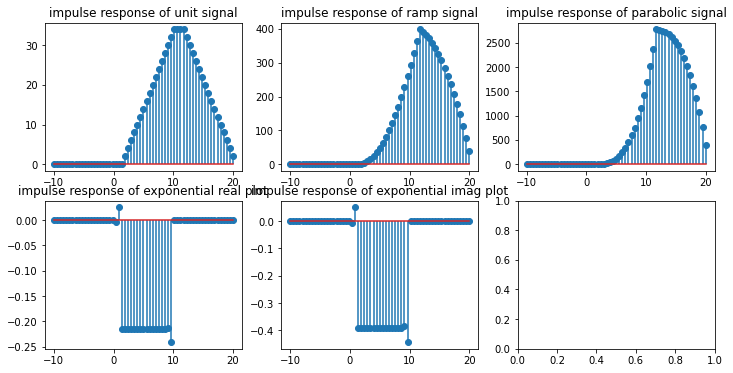

In [110]:
n  = np.linspace(-10,20,30)
h = []
for k in n:
    if k-3>=0:
        h.append(2)
    else:
        h.append(0)
 
exp_re=[]
for k in n :
    if k <0:
        m = (np.exp(2*k + 3j*k)).real
        exp_re.append(m)
    else:
        exp_re.append(0)
exp_img=[]
for k in n :
    if k <0:
        m = (np.exp(2*k + 3j*k)).imag
        exp_img.append(m)
    else:
        exp_img.append(0)      

a1 = [cont_fun(n),unit_ramp(n),unit_para(n),exp_re,exp_img]
out =[]
for i in range(len(a1)):
    k = convolution(h,a1[i])
    out.append(k)
a = len(out[0])
s = np.linspace(-10,20,a)
fig, axs = plt.subplots(2,3, figsize=(12,6))
name = ["unit signal","ramp signal","parabolic signal","exponential real plot","exponential imag plot"]
c =1
for k in range(len(out)):
    plt.subplot(2,3,c)
    plt.stem(s,out[k],use_line_collection=True)
    plt.title("impulse response of "+str(name[k]))
    c =c+1